# Loading packages

In [1]:
import os 
import numpy as np
import splitfolders
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.callbacks import EarlyStopping

%matplotlib inline

# Loading and splitting the data

In [2]:
os.chdir("C:/Users/tonyy/OneDrive/Desktop/ML project 2")

In [3]:
data_path = 'dog'
splitted_data = 'split-data'

In [4]:
splitfolders.ratio(data_path, output="splitted data", seed=101, ratio=(.8, .1, .1))

Copying files: 7604 files [00:28, 263.47 files/s]


(256, 256, 3)

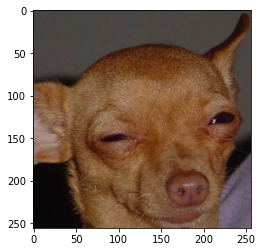

In [5]:
#Checking the image

#We load the image and then convert it to numpy array
sample_image = img_to_array(load_img("splitted data/train/CHIHUAHUA/0C46WCC7IJA4.jpg"))

#Then we normalize the image and then plot it
plt.imshow(sample_image/255)

#We check the shape for the image and it returns an 256x256 image pixel
sample_image.shape

# Data augmentation

In [4]:
#Setting up the parameter

#For the parameter in the flow from directory
#I rescale it to 128x128 and use 32 batch size you can try other size 
batch_size = 32
img_width = 128
img_height = 128

#The augmetnation parameter
rotation_range = 0.4
width_shift_range = 0.2
height_shift_range = 0.3
shear_range = 0.2
zoom_range = 0.2

In [5]:
#Making the Image Data Generator

#The path for the data
path_train = "splitted data/train"
path_test = "splitted data/test"
path_val = "splitted data/val"

In [6]:
#We use ImageDataGenerator to help us augment the image
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = rotation_range,
                                   width_shift_range = width_shift_range,
                                   height_shift_range = height_shift_range,
                                   shear_range = shear_range,
                                   zoom_range = zoom_range,
                                   horizontal_flip = True,
                                   fill_mode = 'nearest'
                                    )

train_generator = train_datagen.flow_from_directory(directory = path_train,
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    target_size = (img_width, img_height)
                                                    )

test_datagen = ImageDataGenerator(rescale = 1./255.)

test_generator = test_datagen.flow_from_directory(directory = path_test,
                                                  batch_size = batch_size,
                                                  class_mode = "categorical",
                                                  target_size = (img_width, img_height)
                                                  )

valid_datagen = ImageDataGenerator(rescale = 1./255.)

valid_generator = test_datagen.flow_from_directory(directory = path_val,
                                                  batch_size = batch_size,
                                                  class_mode = "categorical",
                                                  target_size = (img_width, img_height)
                                                  )

Found 6081 images belonging to 6 classes.
Found 766 images belonging to 6 classes.
Found 757 images belonging to 6 classes.


# Modeling

# First model: traditional CNN

In [31]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)))
model1.add(tf.keras.layers.MaxPooling2D(2, 2))
model1.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2, 2))
model1.add(tf.keras.layers.Conv2D(128, (3,3), activation='relu'))
model1.add(tf.keras.layers.MaxPooling2D(2, 2))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dropout(0.7))
model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dense(6, activation='softmax'))

In [32]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 25088)            

In [33]:
model1.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Number of epochs for training
epochs = 10

In [34]:
history = model1.fit(train_generator,
          epochs = epochs,
          validation_data = valid_generator,
          verbose = 1
         )

Epoch 1/10
191/191 [==============================] - 90s 472ms/step - loss: 1.6477 - accuracy: 0.2865 - val_loss: 1.5881 - val_accuracy: 0.3474
Epoch 2/10
191/191 [==============================] - 95s 498ms/step - loss: 1.5627 - accuracy: 0.3416 - val_loss: 1.5172 - val_accuracy: 0.3540
Epoch 3/10
191/191 [==============================] - 90s 473ms/step - loss: 1.5398 - accuracy: 0.3626 - val_loss: 1.4587 - val_accuracy: 0.4082
Epoch 4/10
191/191 [==============================] - 92s 482ms/step - loss: 1.5227 - accuracy: 0.3733 - val_loss: 1.4361 - val_accuracy: 0.4055
Epoch 5/10
191/191 [==============================] - 92s 481ms/step - loss: 1.4741 - accuracy: 0.3994 - val_loss: 1.3709 - val_accuracy: 0.4478
Epoch 6/10
191/191 [==============================] - 85s 446ms/step - loss: 1.4587 - accuracy: 0.4054 - val_loss: 1.3512 - val_accuracy: 0.4557
Epoch 7/10
191/191 [==============================] - 85s 446ms/step - loss: 1.4550 - accuracy: 0.4124 - val_loss: 1.4249 - val_ac

In [36]:
model1.evaluate(test_generator)

24/24 [==============================] - 3s 141ms/step - loss: 1.3563 - accuracy: 0.4491


[1.3563320636749268, 0.44908615946769714]

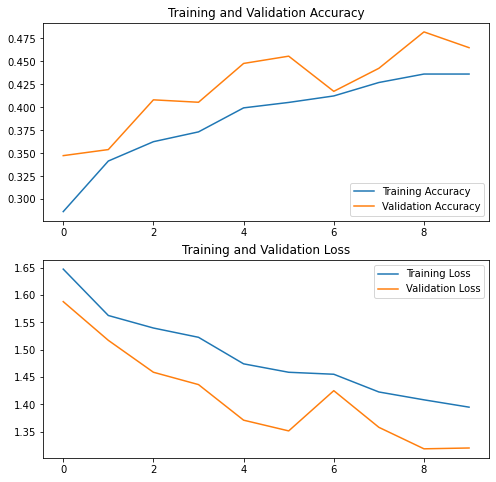

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Second model: Deeply connected convolution network DenseNet121

In [9]:
denseNet = tf.keras.applications.DenseNet121( include_top=False,
                                             weights="imagenet",
                                             input_shape=(150, 150, 3))

In [10]:
denseNet.trainable = False

In [34]:
model=tf.keras.models.Sequential()
model.add(denseNet)
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Functional)     (None, 4, 4, 1024)        7037504   
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               8389120   
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 774       
Total params: 15,493,062
Trainable params: 8,455,558
Non-trainable params: 7,037,504
___________________________________

In [35]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Number of epochs for training
epochs = 10

In [18]:
history = model.fit(train_generator,
          epochs = epochs,
          validation_data = valid_generator,
          verbose = 1)

Epoch 1/10
191/191 [==============================] - 177s 927ms/step - loss: 1.4486 - accuracy: 0.6987 - val_loss: 0.4001 - val_accuracy: 0.8520
Epoch 2/10
191/191 [==============================] - 149s 779ms/step - loss: 0.6847 - accuracy: 0.7729 - val_loss: 0.3618 - val_accuracy: 0.8626
Epoch 3/10
191/191 [==============================] - 149s 782ms/step - loss: 0.6491 - accuracy: 0.7849 - val_loss: 0.4027 - val_accuracy: 0.8653
Epoch 4/10
191/191 [==============================] - 148s 774ms/step - loss: 0.5829 - accuracy: 0.8037 - val_loss: 0.3728 - val_accuracy: 0.8613
Epoch 5/10
191/191 [==============================] - 151s 790ms/step - loss: 0.5692 - accuracy: 0.8073 - val_loss: 0.3603 - val_accuracy: 0.8758
Epoch 6/10
191/191 [==============================] - 148s 775ms/step - loss: 0.5237 - accuracy: 0.8226 - val_loss: 0.4987 - val_accuracy: 0.8573
Epoch 7/10
191/191 [==============================] - 150s 784ms/step - loss: 0.5775 - accuracy: 0.8087 - val_loss: 0.3234 -

In [19]:
model.evaluate(test_generator)

24/24 [==============================] - 16s 660ms/step - loss: 0.3946 - accuracy: 0.8734


[0.39463022351264954, 0.8733681440353394]

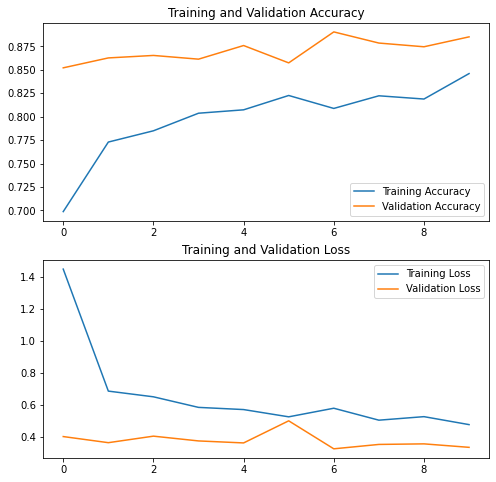

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Third model: VGG16

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

In [32]:
model2 = VGG16(weights="imagenet", include_top=False, input_shape=(150,150,3))

In [33]:
model2.trainable = False

In [34]:
model2.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [35]:
modelVGG16=tf.keras.models.Sequential()
modelVGG16.add(model2)
modelVGG16.add(tf.keras.layers.Flatten())
modelVGG16.add(tf.keras.layers.Dense(50, activation='relu'))
modelVGG16.add(tf.keras.layers.Dense(20, activation='relu'))
modelVGG16.add(tf.keras.layers.Dense(6, activation='softmax'))

In [36]:
modelVGG16.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                409650    
_________________________________________________________________
dense_10 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 126       
Total params: 15,125,484
Trainable params: 410,796
Non-trainable params: 14,714,688
_________________________________________________________________


In [37]:
modelVGG16.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])

In [45]:
epochs= 10

In [46]:
es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

In [47]:
history = modelVGG16.fit(
    train_generator,
    epochs = epochs,
    validation_data = valid_generator,
    batch_size=32,
    callbacks=[es],
    verbose = 1)

Epoch 1/10
191/191 [==============================] - 306s 2s/step - loss: 1.0284 - accuracy: 0.6144 - val_loss: 0.9158 - val_accuracy: 0.6433
Epoch 2/10
191/191 [==============================] - 305s 2s/step - loss: 0.9939 - accuracy: 0.6339 - val_loss: 0.8964 - val_accuracy: 0.6565
Epoch 3/10
191/191 [==============================] - 303s 2s/step - loss: 0.9792 - accuracy: 0.6297 - val_loss: 0.8983 - val_accuracy: 0.6724
Epoch 4/10
191/191 [==============================] - 303s 2s/step - loss: 0.9336 - accuracy: 0.6560 - val_loss: 0.8639 - val_accuracy: 0.6869
Epoch 5/10
191/191 [==============================] - 302s 2s/step - loss: 0.9108 - accuracy: 0.6588 - val_loss: 0.8795 - val_accuracy: 0.6816
Epoch 6/10
191/191 [==============================] - 303s 2s/step - loss: 0.9188 - accuracy: 0.6611 - val_loss: 0.8490 - val_accuracy: 0.6896
Epoch 7/10
191/191 [==============================] - 305s 2s/step - loss: 0.8874 - accuracy: 0.6670 - val_loss: 0.9450 - val_accuracy: 0.6565

In [48]:
modelVGG16.evaluate(test_generator)

24/24 [==============================] - 32s 1s/step - loss: 0.9510 - accuracy: 0.6762


[0.9510065317153931, 0.6762402057647705]

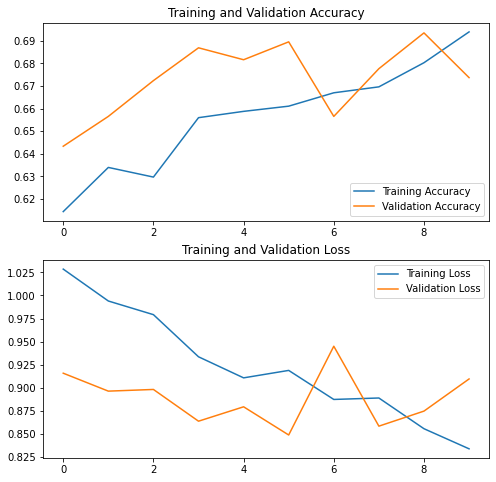

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()